In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\gls.csv')

In [13]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [15]:
X = df.drop(['Type'], axis=1)
Y = df['Type']

In [16]:
df.corr()['Type'].abs().sort_values(ascending=False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

C:\Users\aaksh\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\aaksh\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2487: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\aaksh\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\aaksh\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


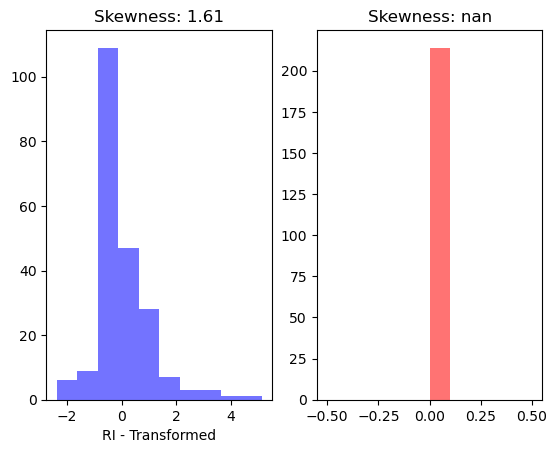

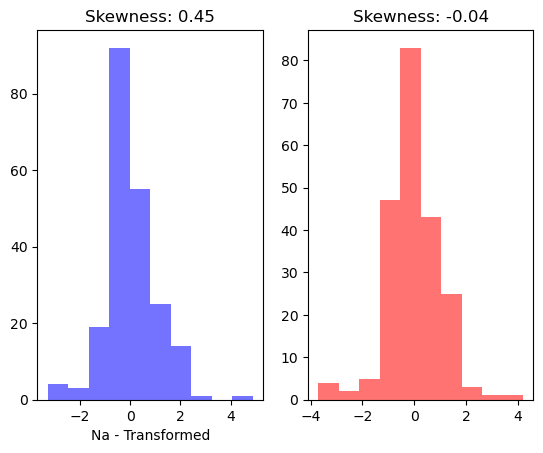

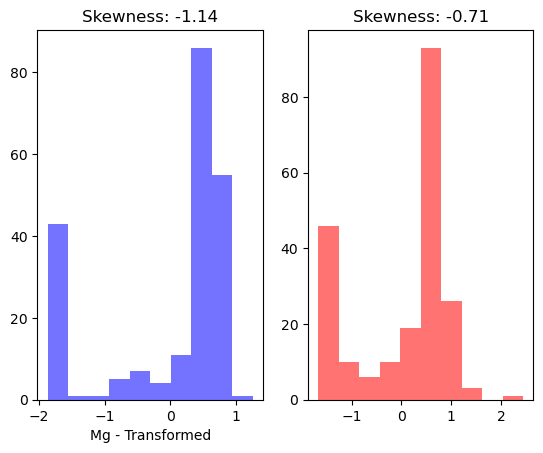

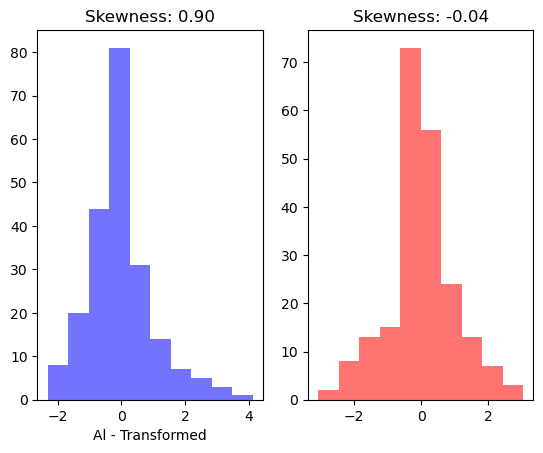

C:\Users\aaksh\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


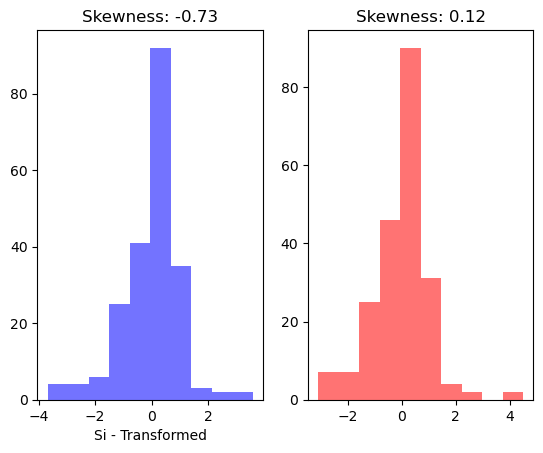

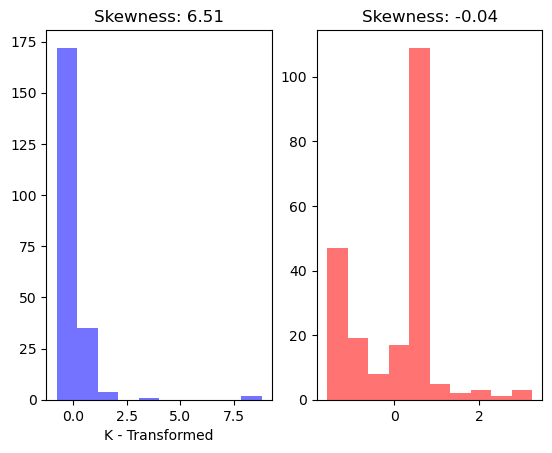

C:\Users\aaksh\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


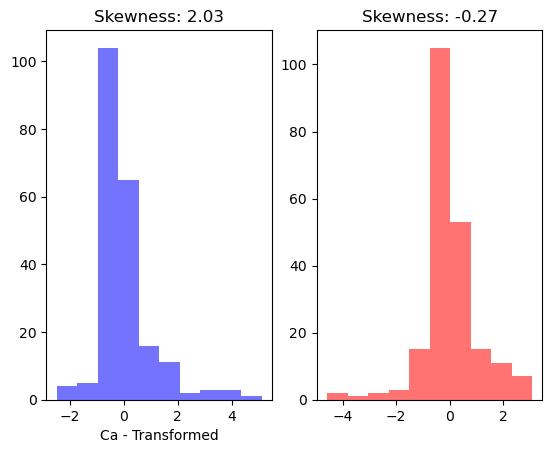

C:\Users\aaksh\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


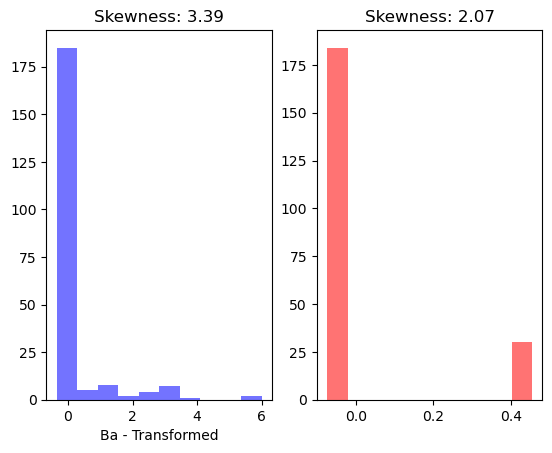

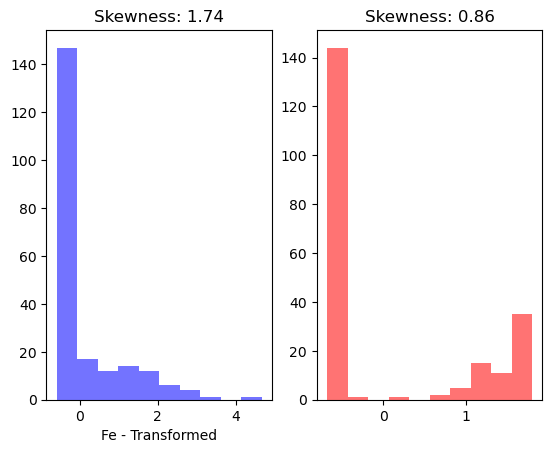

In [17]:
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox

classes = X.columns.values

X_unsk = pd.DataFrame()

for c in classes:
    scaled = preprocessing.scale(X[c]) 
    boxcox_scaled = preprocessing.scale(boxcox(X[c] + np.max(np.abs(X[c]) +1) )[0])
    
    X_unsk[c] = boxcox_scaled
    
    skness = skew(scaled)
    boxcox_skness = skew(boxcox_scaled)
    
    figure = plt.figure()
    # First the original data shape
    figure.add_subplot(121)   
    plt.hist(scaled,facecolor='blue',alpha=0.55) 
    plt.xlabel(c + " - Transformed") 
    plt.title("Skewness: {0:.2f}".format(skness)) 
    
    figure.add_subplot(122) 
    plt.hist(boxcox_scaled,facecolor='red',alpha=0.55) 
    plt.title("Skewness: {0:.2f}".format(boxcox_skness)) 

    plt.show()

C:\Users\aaksh\AppData\Local\Temp\ipykernel_13680\3165217873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


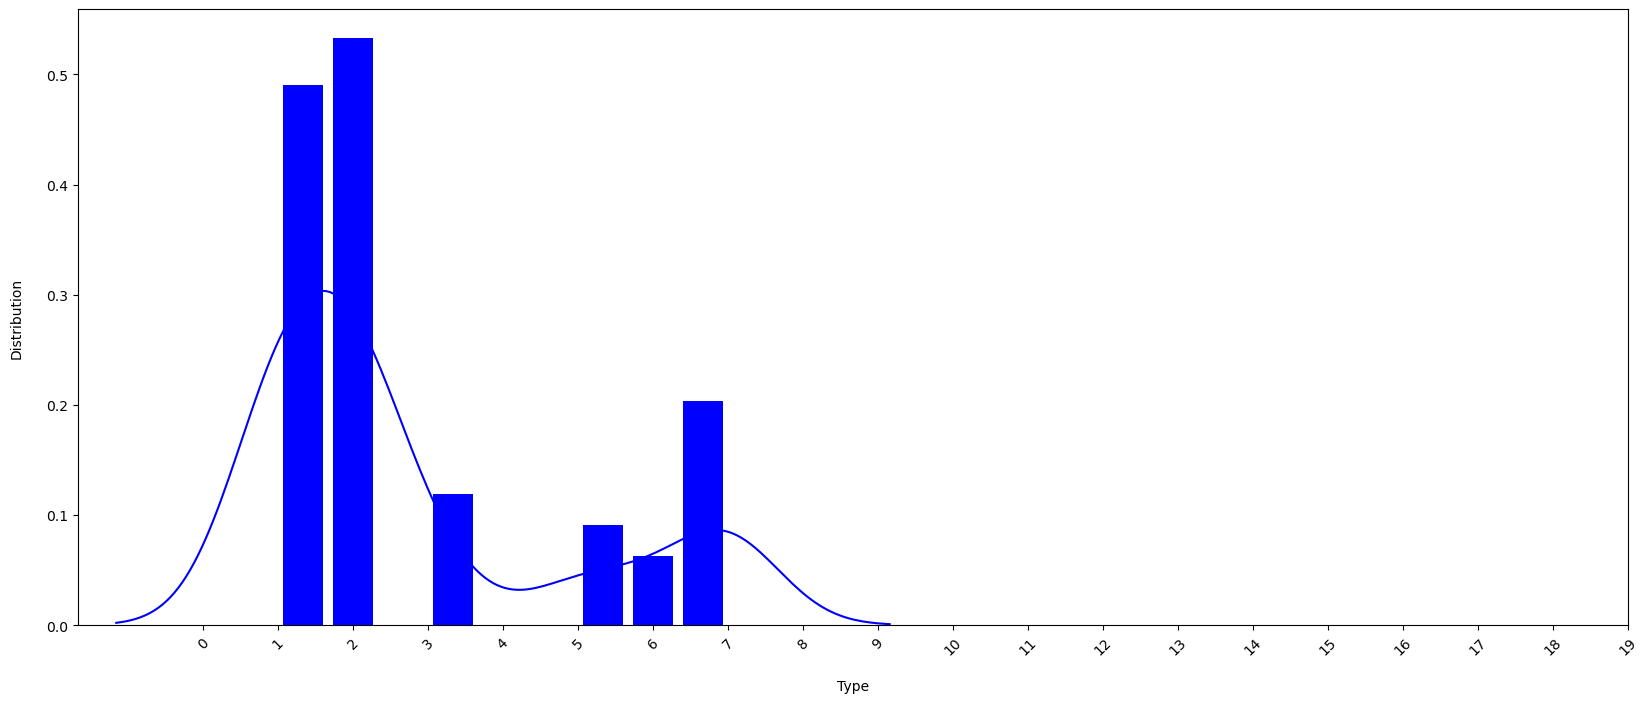

In [18]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Type")

In [19]:
df.Type.max()

7

In [20]:
7/3

2.3333333333333335

In [21]:
2.3333333333333335*2

4.666666666666667

In [22]:
4.666666666666667*3

14.0

In [23]:
df1=df.copy()
df1['Type_cat'] = pd.cut(x = df1['Type'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_cat
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,Low
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,Low
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,Low
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,Low
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,Low


In [24]:
df1.Type_cat.value_counts()

Low       176
Medium     38
High        0
Name: Type_cat, dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RI        214 non-null    float64 
 1   Na        214 non-null    float64 
 2   Mg        214 non-null    float64 
 3   Al        214 non-null    float64 
 4   Si        214 non-null    float64 
 5   K         214 non-null    float64 
 6   Ca        214 non-null    float64 
 7   Ba        214 non-null    float64 
 8   Fe        214 non-null    float64 
 9   Type      214 non-null    int64   
 10  Type_cat  214 non-null    category
dtypes: category(1), float64(9), int64(1)
memory usage: 17.2 KB


In [26]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['Type_cat'], dtype='object')

In [27]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

C:\Users\aaksh\AppData\Local\Temp\ipykernel_13680\959258083.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


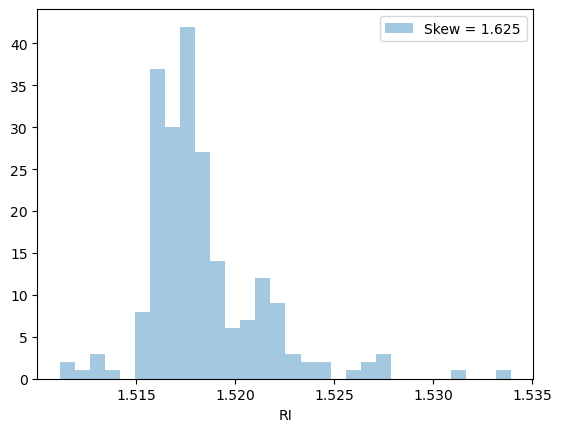

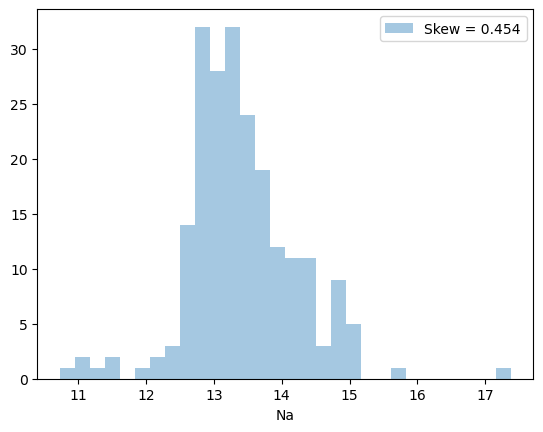

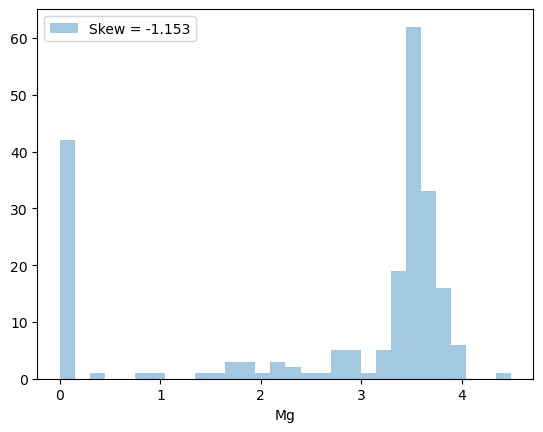

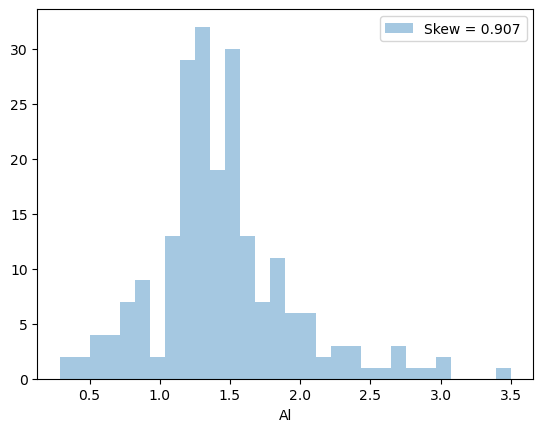

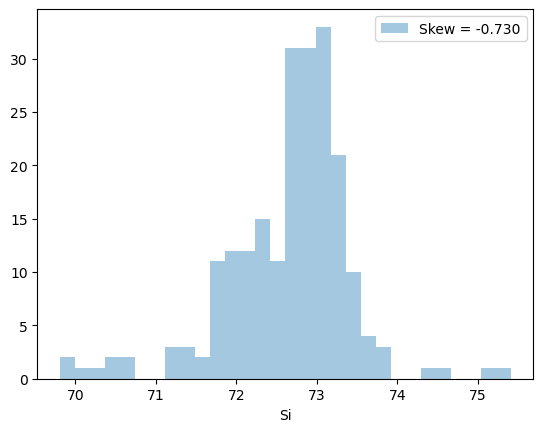

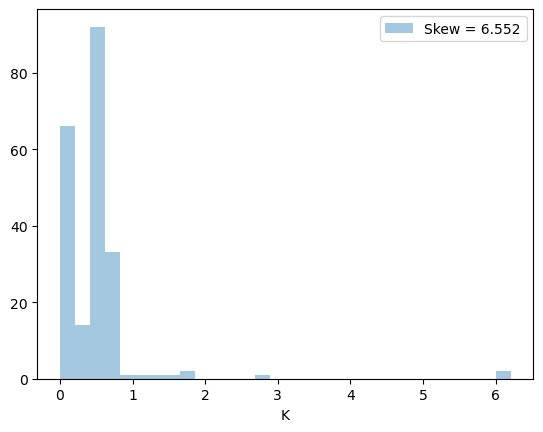

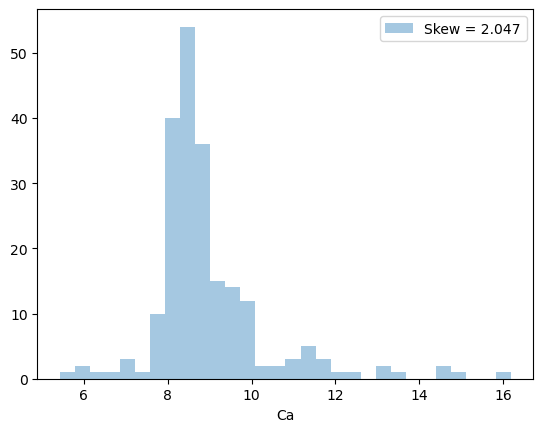

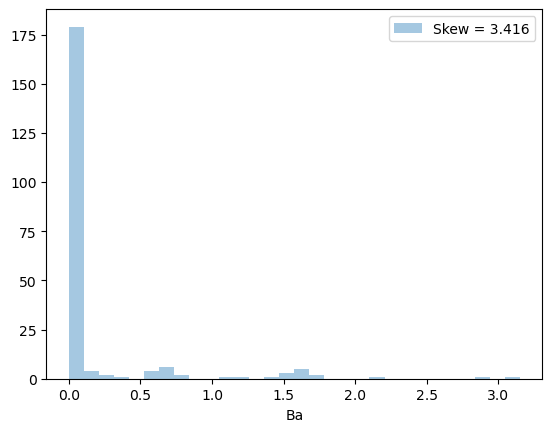

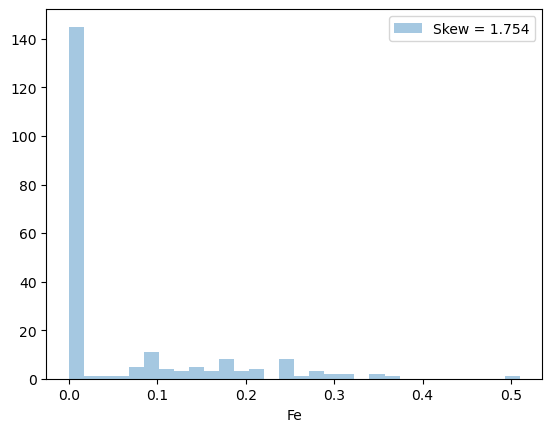

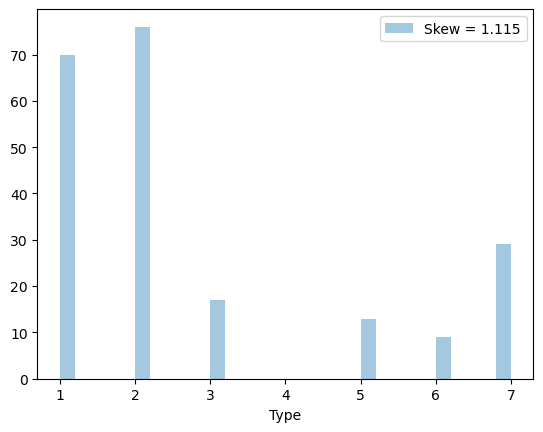

In [28]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [29]:
numerical_features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

IndexError: index 8 is out of bounds for axis 0 with size 8

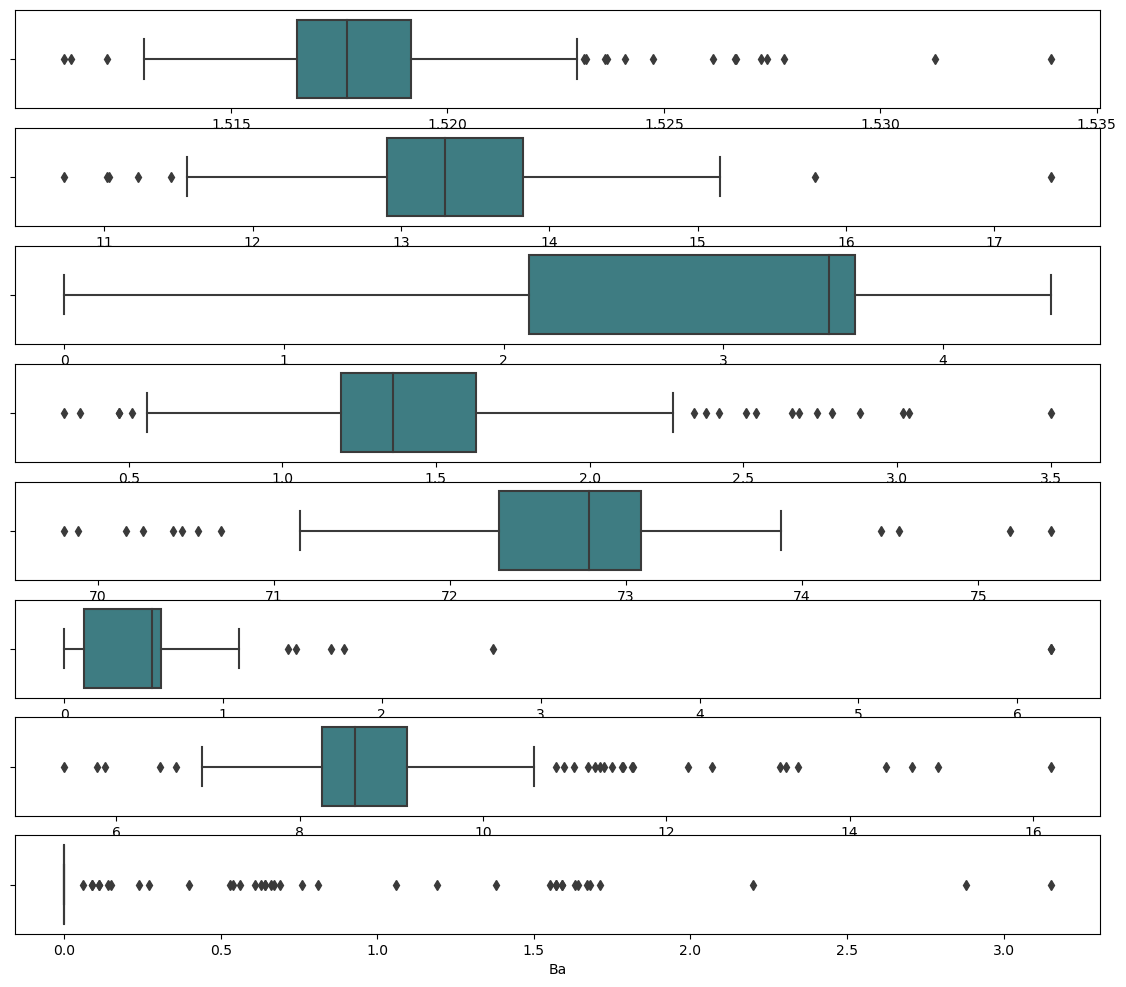

In [30]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Type',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

Index(['Type_cat'], dtype='object')


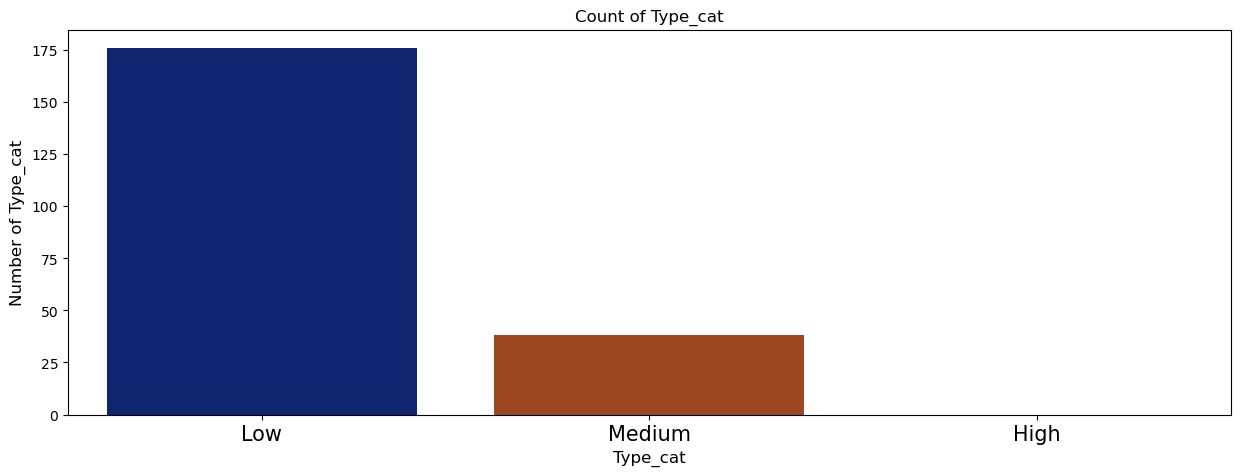

In [31]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df1[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=df1, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [32]:
df1.Type_cat.value_counts()

Low       176
Medium     38
High        0
Name: Type_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

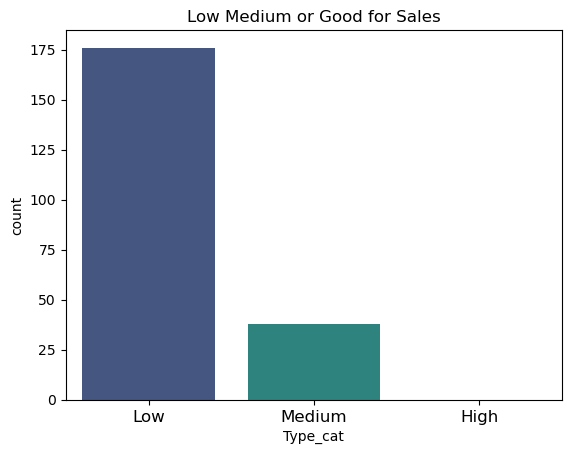

In [33]:
sns.countplot(x='Type_cat', data=df1, palette = 'viridis', 
              order=df1['Type_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

In [34]:
data_ = df1.copy()
data_.drop('Type',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [35]:
data_['Type'] = df1.Type_cat
data_.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,Low
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,Low
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,Low
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,Low
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,Low


In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [37]:
le = LabelEncoder()
le.fit(data_["Type"])
data_["Type"]=le.transform(data_["Type"])
data_.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [38]:
X = data_.iloc[:, :-1]

y=  data_.Type

In [39]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [40]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [41]:
scores = fit.scores_

features = fit.transform(X)

In [42]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,101.019022,Ba
2,66.425454,Mg
3,7.955344,Al
5,5.758678,K
1,4.039452,Na
8,1.771051,Fe
6,0.350452,Ca
4,0.087991,Si
0,0.000042,RI


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of labels (9).

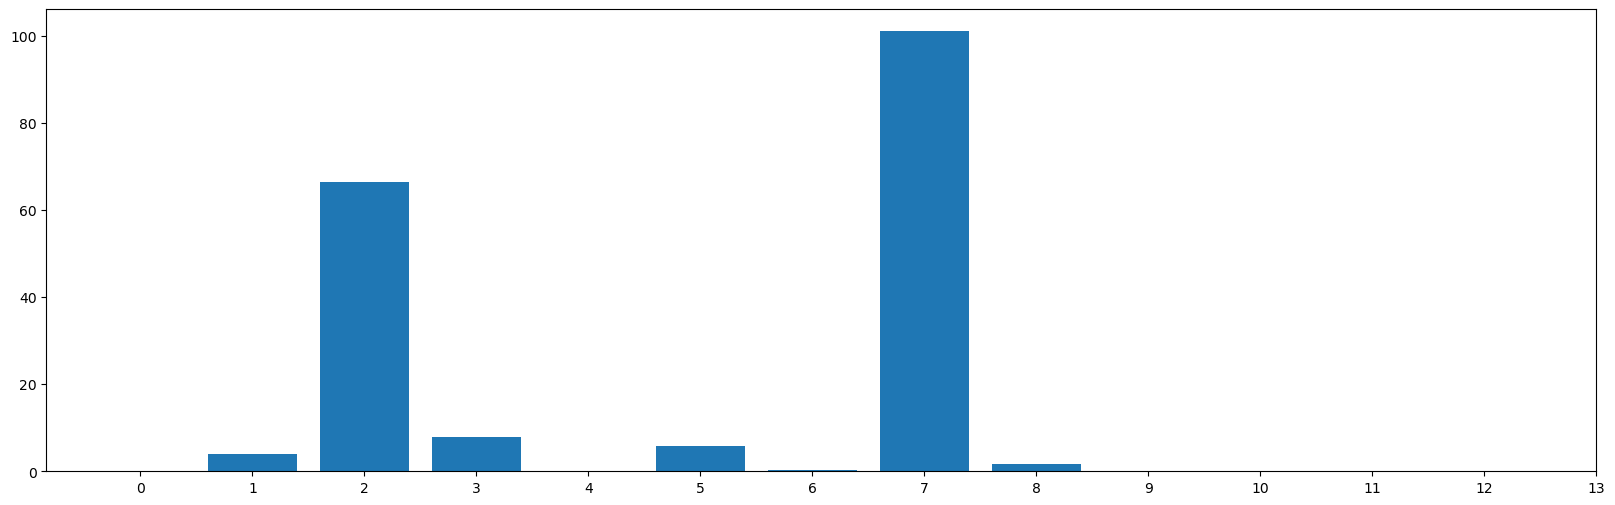

In [43]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

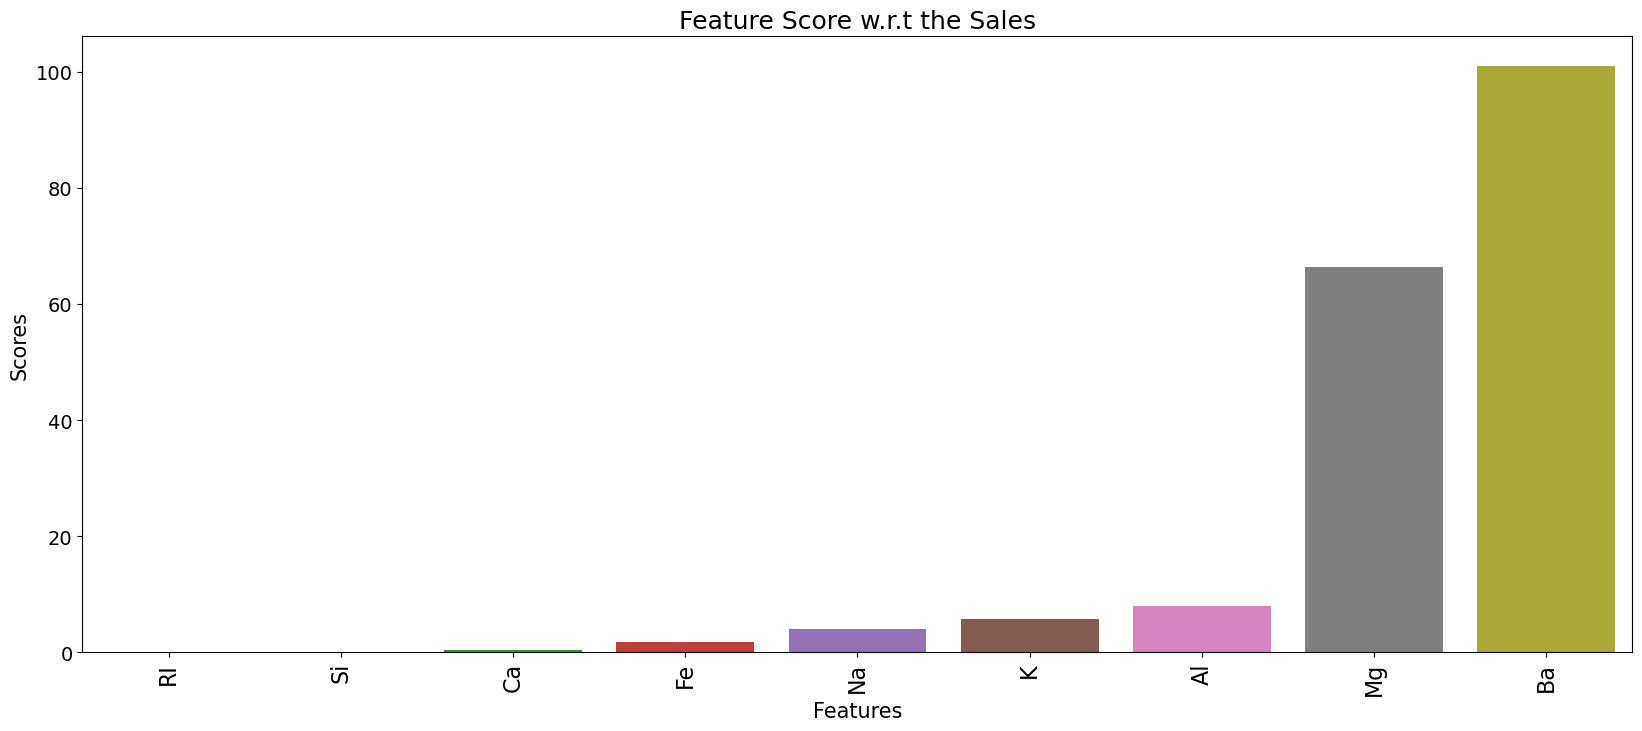

In [47]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [65]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [66]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.863 (0.042)


In [67]:
# bagging ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.88950817,-0.93540416,0.08392824,0.26438806,-0.52828711,-1.21102238,-0.4499934,1.47392391,-0.19737726,-0.22252503,0.02307668,0.26953276,0.03572757,-0.51606983,-0.39937452,1.8121736,-0.00775917,-0.02514283,-0.76089365,1.58692212]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -187
